# Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data

In [2]:
# read in speedup data
df_speedup = pd.read_csv('./speedup_data.csv')
print(df_speedup.columns)

Index(['executors', 'cores', 'rows per sec', 'addBatch', 'getBatch',
       'getOffset', 'queryPlanning', 'triggerExecution', 'walCommit', 'total'],
      dtype='object')


# Speedup

In [4]:
# select target column ('rows per sec' or 'total')
y_target = 'rows per sec'

# prepare data for core plot
df_core = pd.DataFrame()
df_core['cores'] = np.arange(1,5)
for i in range(8):
    df_temp = df_speedup[df_speedup['executors']==i+1]
    df_temp.reset_index(inplace=True,drop=True)
    df_core[i+1] = df_temp[y_target]

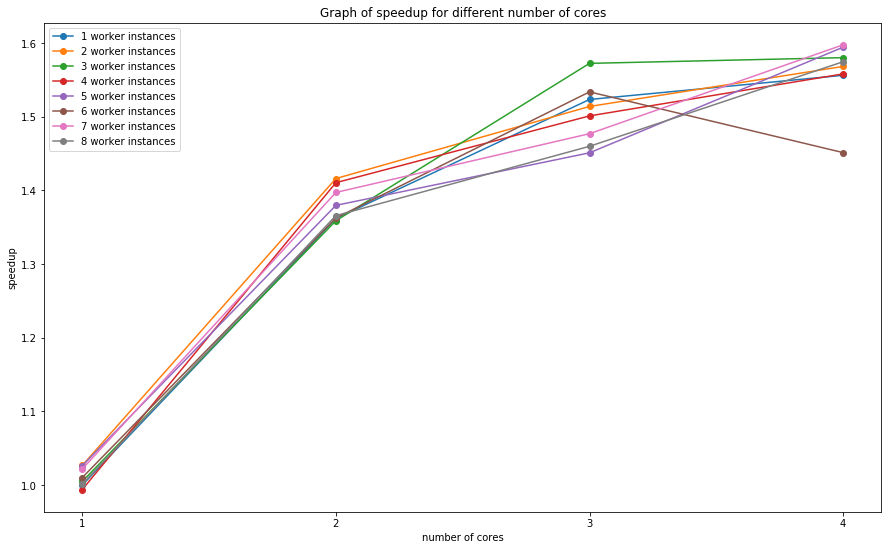

In [5]:
# Plot of speedup for different number of cores
fig, ax = plt.subplots(figsize=(15,9))
x = df_core['cores']
serial = df_core[1][0]

for i in range(8):
    y = df_core[i+1]
    speedup = []
    for j in range(4):
        if y_target == 'rows per sec':
            speedup.append(y[j]/serial)
        else:
            speedup.append(serial/y[j])
            
    # Plot the results
    plt.plot(x, speedup, '-o',label='{} worker instances'.format(i+1))

plt.xlabel('number of cores')
plt.ylabel('speedup')
plt.xticks(x)
plt.legend()
plt.title('Graph of speedup for different number of cores')
plt.savefig('speedup_cores.png')
plt.show()

# Feasibility

In [19]:
# variables
sampling_frequency = 30 # Hz
number_of_sensors = 6
update_interval = 10

In [20]:
# prepare data for feasibility study
df_feasibility = pd.DataFrame()
df_feasibility['worker instances'] = df_speedup['executors']
df_feasibility['cores'] = df_speedup['cores']
df_feasibility['number of students'] = np.floor(df_speedup['rows per sec']/(sampling_frequency*number_of_sensors*update_interval))

# cast type as integers
df_feasibility = df_feasibility.astype('int32')

# save feasibility data
df_feasibility.to_csv('./df_feasibility.csv')

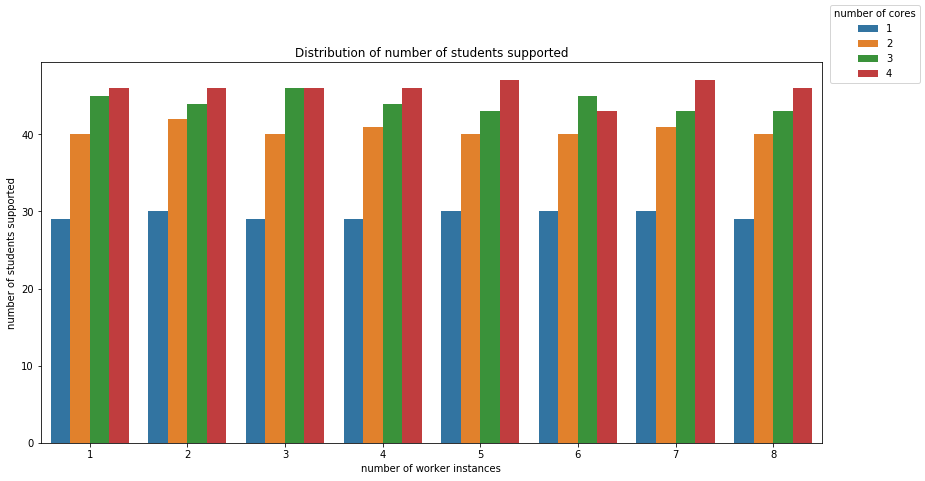

In [21]:
# plot distribution of number of students supported
fig, ax = plt.subplots(figsize=(14,7))

# Plot the results
sns.barplot(x='worker instances', y='number of students', hue='cores',data=df_feasibility)

plt.xlabel('number of worker instances')
plt.ylabel('number of students supported')
ax.get_legend().remove()
fig.legend(title='number of cores')
plt.title('Distribution of number of students supported')
plt.savefig('feasibility_worker_instances.png')
plt.show()
